In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
%cd /content/gdrive/My Drive/Assignment 4

/content/gdrive/My Drive/Assignment 4


In [10]:
import gensim
import pandas as pd
import csv
from gensim.parsing.preprocessing import STOPWORDS
import re
from gensim import models
import matplotlib.pyplot as plt
csv.field_size_limit(1000000000)

1000000000

In [11]:
df = pd.read_csv("state-of-the-union.csv",names= ["Year","Speech"])
display(df)

,Year,Speech
0,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."
1,1790,\nState of the Union Address\nGeorge Washingto...
2,1791,\nState of the Union Address\nGeorge Washingto...
3,1792,\nState of the Union Address\nGeorge Washingto...
4,1793,\nState of the Union Address\nGeorge Washingto...
...,...,...
221,2008,\nState of the Union Address\nGeorge W. Bush\n...
222,2009,\nAddress to Joint Session of Congress \nBarac...
223,2010,\nState of the Union Address\nBarack Obama \nJ...
224,2011,\nState of the Union Address\nBarack Obama \nJ...


In [12]:
text_data = df.values[:,1]

In [13]:
result = []
for text in text_data:
    text = text.replace('\n',' ')
    text = text.replace('! ',' ')
    text = text.replace(', ',' ')
    re.sub('[^A-Za-z]+', '',text)
    tmp = text.split(' ')
    t2 = []
    for words in tmp:
        words = words.lower()
        t2.append(words)
    result.append(t2)

In [14]:
f = open('stopwords-en.txt','r')
stopwords = set()
for words in f:
    stopwords.add(words)
stopwords.add("said")
stopwords.add("government")
stopwords.add('states')
stopwords.add('great')
stopwords.add('united')
stopwords.add('work')
stopwords.add('public')
stopwords.add('Union')
stopwords.add('Address')
stopwords.add('america')
stopwords.add('let\'s')
stopwords.add('it\'s')
stopwords.add('that\'s')
stopwords.add('world')
stopwords.add('year')
f.close()

In [15]:
processed_data = [[token for token in text if (token not in STOPWORDS and token not in stopwords)] for text in result]

In [16]:
# print(processed_data[0])

In [17]:
dictionary = gensim.corpora.Dictionary(processed_data)

In [18]:
print(dictionary)

Dictionary(44571 unique tokens: ['', '(comprehending', '(of', '1790', '8']...)


In [19]:
bow = [dictionary.doc2bow(text) for text in processed_data]

# Generating tf-idf

In [20]:
tf_idf = models.TfidfModel(bow)

# LSI Model

In [ ]:
def lsi_coherence(corpus,dictionary,bow):
    x = []
    y = []
    for k in range(1,502,50):
        lsi_model = models.LsiModel(tf_idf[bow],id2word = dictionary,num_topics = k)
        coherence_model = models.CoherenceModel(lsi_model,texts = corpus,dictionary = dictionary)
        cv = coherence_model.get_coherence()
        x.append(k)
        y.append(cv)
    plt.plot(x,y)
    plt.xlabel("Number of Topics")
    plt.ylabel("Topic coherence")
    plt.title("LSI Model")
    plt.show()

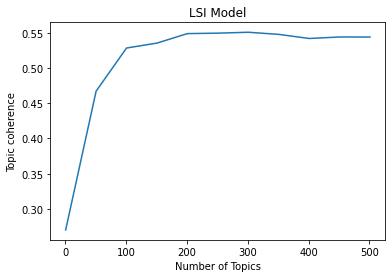

In [ ]:
lsi_coherence(processed_data,dictionary,bow)

In [ ]:
corpus_tfidf = tf_idf[bow]
lsi_model = models.LsiModel(corpus_tfidf,id2word = dictionary,num_topics = 51)

In [ ]:
lsi_model.show_topics()

[(0,
  '-0.084*"-" + -0.056*"mexico" + -0.053*"treaty" + -0.052*"economic" + -0.051*"subject" + -0.050*"tonight" + -0.050*"treasury" + -0.048*"program" + -0.048*"duties" + -0.047*"silver"'),
 (1,
  '0.174*"tonight" + 0.116*"help" + 0.109*"americans" + 0.107*"budget" + 0.105*"program" + 0.104*"jobs" + 0.103*"economic" + 0.103*"--" + 0.102*"we\'ve" + 0.100*"programs"'),
 (2,
  '-0.937*"-" + -0.056*"+" + -0.040*"--" + -0.035*"1864" + -0.035*"five-twenties" + -0.034*"consols" + -0.034*"1882" + -0.029*"1883" + -0.026*"consular" + -0.026*"chile"'),
 (3,
  '-0.166*"--" + -0.162*"tonight" + -0.102*"we\'re" + -0.093*"we\'ve" + 0.085*"interstate" + 0.083*"economic" + 0.082*"program" + -0.079*"jobs" + 0.071*"industrial" + 0.069*"farm"'),
 (4,
  '-0.186*"--" + 0.138*"-" + 0.122*"program" + -0.113*"silver" + 0.098*"economic" + -0.098*"tonight" + 0.097*"communist" + 0.095*"soviet" + -0.095*"gold" + -0.077*"we\'re"'),
 (5,
  '0.157*"--" + -0.131*"silver" + -0.128*"gold" + 0.126*"interstate" + -0.104*

# LDA Model

In [ ]:
def lda_coherence(corpus,dictionary,bow):
    x = []
    y = []
    for k in range(10,301,10):
        lda_model = models.LdaModel(tf_bow,id2word = dictionary,num_topics = k)
        coherence_model = models.CoherenceModel(lda_model,texts = corpus,dictionary = dictionary)
        cv = coherence_model.get_coherence()
        x.append(k)
        y.append(cv)
    plt.plot(x,y)
    plt.xlabel("Number of Topics")
    plt.ylabel("Topic coherence")
    plt.title("LDA Model")
    plt.show()

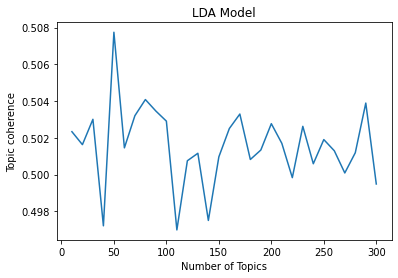

In [ ]:
num_topics = lda_coherence(processed_data,dictionary,bow)

In [260]:
lda_model = models.LdaModel(bow,id2word = dictionary,num_topics = 51,passes = 5)

In [261]:
for i in range((lda_model.num_topics)):
    print(lda_model.print_topic(i,topn = 10))

0.019*"" + 0.007*"gold" + 0.006*"people" + 0.004*"treasury" + 0.004*"congress" + 0.004*"war" + 0.004*"notes" + 0.004*"silver" + 0.003*"country" + 0.003*"present"
0.010*"" + 0.002*"congress" + 0.002*"time" + 0.002*"new" + 0.002*"american" + 0.002*"war" + 0.002*"people" + 0.001*"state" + 0.001*"shall" + 0.001*"act"
0.018*"" + 0.002*"time" + 0.002*"new" + 0.002*"people" + 0.002*"congress" + 0.002*"war" + 0.002*"state" + 0.002*"american" + 0.002*"country" + 0.002*"present"
0.014*"" + 0.003*"congress" + 0.002*"war" + 0.002*"time" + 0.002*"country" + 0.002*"people" + 0.002*"american" + 0.002*"state" + 0.002*"new" + 0.002*"national"
0.016*"" + 0.004*"congress" + 0.003*"shall" + 0.003*"citizens" + 0.003*"necessary" + 0.003*"time" + 0.003*"state" + 0.003*"country" + 0.003*"present" + 0.002*"commerce"
0.019*"" + 0.002*"time" + 0.002*"congress" + 0.002*"people" + 0.002*"war" + 0.002*"new" + 0.002*"country" + 0.002*"act" + 0.002*"years" + 0.001*"american"
0.019*"" + 0.006*"congress" + 0.004*"state

In [ ]:
lda_model.print_topics(num_topics = 10)

[(13,
  '0.003*"congress" + 0.002*"people" + 0.002*"time" + 0.002*"american" + 0.002*"country" + 0.001*"national" + 0.001*"necessary" + 0.001*"years" + 0.001*"shall" + 0.001*"power"'),
 (24,
  '0.002*"people" + 0.002*"time" + 0.002*"congress" + 0.002*"state" + 0.001*"citizens" + 0.001*"american" + 0.001*"general" + 0.001*"country" + 0.001*"national" + 0.001*"years"'),
 (44,
  '0.003*"congress" + 0.002*"time" + 0.002*"country" + 0.002*"present" + 0.002*"national" + 0.001*"people" + 0.001*"american" + 0.001*"shall" + 0.001*"mexico" + 0.001*"subject"'),
 (31,
  '0.003*"congress" + 0.003*"people" + 0.002*"american" + 0.002*"state" + 0.002*"shall" + 0.002*"time" + 0.002*"country" + 0.002*"present" + 0.002*"national" + 0.001*"general"'),
 (43,
  '0.002*"congress" + 0.002*"people" + 0.001*"present" + 0.001*"country" + 0.001*"american" + 0.001*"time" + 0.001*"national" + 0.001*"power" + 0.001*"shall" + 0.001*"state"'),
 (11,
  '0.005*"congress" + 0.003*"state" + 0.003*"laws" + 0.003*"citizens"

# Grouping all speeches by their decade(for 20th and 21st century)

In [21]:
temp_df = pd.DataFrame(df)
temp_df = temp_df.drop(df[df.Year < 1900].index)
temp_df['Year'] = temp_df['Year']//10

In [22]:
grouped = temp_df.groupby('Year')
for g in grouped:
    print(g)

(190,      Year                                             Speech
111   190  \nState of the Union Address\nWilliam McKinley...
112   190  \nState of the Union Address\nTheodore Rooseve...
113   190  \nState of the Union Address\nTheodore Rooseve...
114   190  \nState of the Union Address\nTheodore Rooseve...
115   190  \nState of the Union Address\nTheodore Rooseve...
116   190  \nState of the Union Address\nTheodore Rooseve...
117   190  \nState of the Union Address\nTheodore Rooseve...
118   190  \nState of the Union Address\nTheodore Rooseve...
119   190  \nState of the Union Address\nTheodore Rooseve...
120   190  \nState of the Union Address\nWilliam H. Taft\...)
(191,      Year                                             Speech
121   191  \nState of the Union Address\nWilliam H. Taft\...
122   191  \nState of the Union Address\nWilliam H. Taft\...
123   191  \nState of the Union Address\nWilliam H. Taft\...
124   191  \nState of the Union Address\nWoodrow Wilson\n...
125   191  

# Plotting a Word map corresponding to this data

In [23]:
from wordcloud import WordCloud
def wordmap(lsi,decade):
    all_t = [lsi.show_topic(t,200) for t in range(lsi.num_topics)]
    flat_list = [item for sublist in all_t for item in sublist]
    # print(all_t)
    flat_dict = {key:value for (key,value) in flat_list}
    wordcloud = WordCloud().fit_words(flat_dict)
    plt.imshow(wordcloud)
    plt.title('Wordmap for the  '+str(decade)+'s')
    plt.savefig('Wordmap for the  '+str(decade)+'s.PNG')
    plt.show()

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:807: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


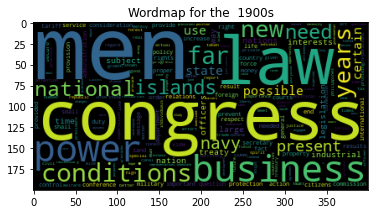

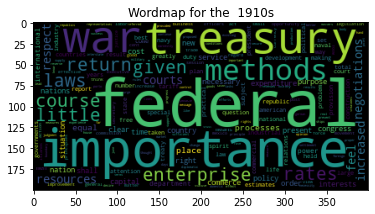

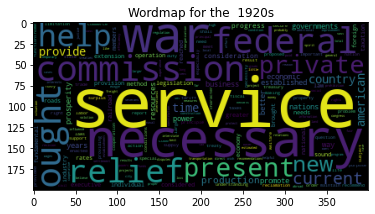

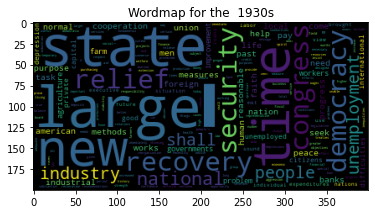

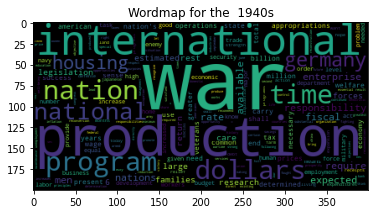

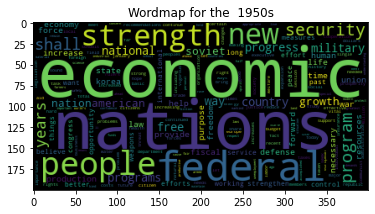

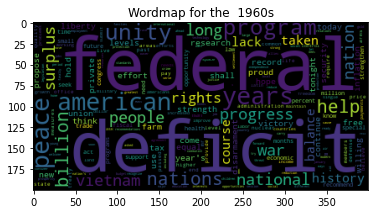

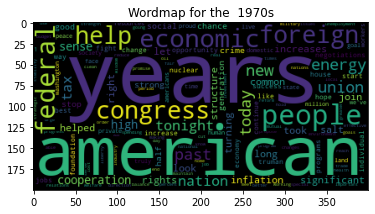

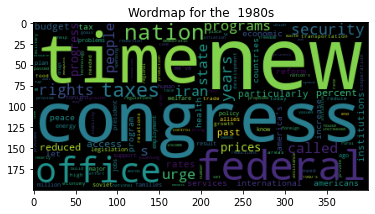

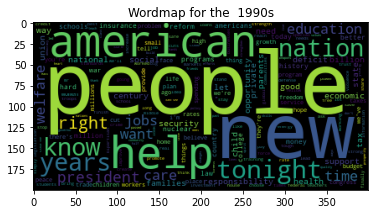

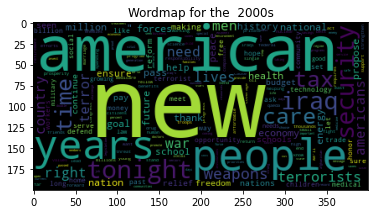

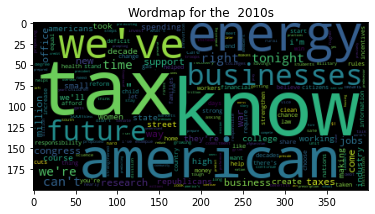

In [25]:
for i,group in enumerate(grouped):
    decade = []
    all_words = []
    for g in group[1].values:
            text = g[1]
            text = text.replace('\n',' ')
            text = text.replace('! ',' ')
            text = text.replace(', ',' ')
            text = text.replace('.',' ')
            re.sub('[^A-Za-z]+', '',text)
            tmp = text.split(' ')
            for words in tmp:
                token= words.lower()
                if(token not in STOPWORDS and token not in stopwords):
                    all_words.append(token)
    decade.append(all_words)
    dictionary = gensim.corpora.Dictionary(decade)
    bow = [dictionary.doc2bow(text) for text in decade]
    num_topics = 20
    lsi_model = models.LdaModel(tf_idf[bow],id2word = dictionary,num_topics = 20)
    wordmap(lsi_model,i*10+1900)